In [1]:
import pandas as pd
import numpy as np

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.io as pio
init_notebook_mode(connected=True)

In [2]:
todos_df = pd.read_csv('mejora_estratificado.csv')
todos_df.head()

,rating,N,mae_binary_k_1,mae_q_k_1,mae_binary_k_2,mae_q_k_2,mae_binary_k_3,mae_q_k_3,mae_binary_k_5,mae_q_k_5,mae_binary_k_10,mae_q_k_10,improvement_k_1,improvement_k_2,improvement_k_3,improvement_k_5,improvement_k_10
0,1.0,3400,1.183748,0.773513,1.081263,0.830680,1.101950,0.851301,1.068634,0.891748,0.994591,0.929505,34.655620,23.174950,22.745970,16.552517,6.543973
1,2.0,3400,1.035823,0.989919,0.996231,1.012087,1.016231,0.980140,0.974996,0.965834,0.976530,0.972820,4.431614,-1.591573,3.551411,0.939707,0.379836
2,2.5,3400,1.093007,0.908937,1.028352,0.945345,1.062582,0.925157,0.984431,0.940490,0.990279,0.923506,16.840727,8.071794,12.933116,4.463589,6.742832
3,3.0,3400,0.984631,0.878731,0.941878,0.873561,0.927571,0.872820,0.933073,0.886002,0.925610,0.889723,10.755321,7.253274,5.902674,5.044819,3.877071
4,3.5,3400,0.833697,0.846698,0.805227,0.809097,0.816375,0.804013,0.857496,0.835627,0.857084,0.840759,-1.559458,-0.480564,1.514350,2.550333,1.904660


In [3]:
todos_df.drop(columns=['mae_binary_k_1', 'mae_q_k_1', 'mae_binary_k_2', 'mae_q_k_2', 'mae_binary_k_3', 'mae_q_k_3', 'mae_binary_k_5', 'mae_q_k_5', 'mae_binary_k_10', 'mae_q_k_10'], inplace=True)

In [4]:
#todos_df.drop(index=[0, 2], inplace=True)

In [5]:
todos_df

,rating,N,improvement_k_1,improvement_k_2,improvement_k_3,improvement_k_5,improvement_k_10
0,1.0,3400,34.655620,23.174950,22.745970,16.552517,6.543973
1,2.0,3400,4.431614,-1.591573,3.551411,0.939707,0.379836
2,2.5,3400,16.840727,8.071794,12.933116,4.463589,6.742832
3,3.0,3400,10.755321,7.253274,5.902674,5.044819,3.877071
4,3.5,3400,-1.559458,-0.480564,1.514350,2.550333,1.904660
5,4.0,3400,2.269356,-0.175078,0.118688,0.252780,1.121721
6,4.5,3400,3.424424,14.118237,10.345440,4.832368,1.341562
7,5.0,3400,2.901128,5.406295,4.045476,4.185037,2.453364


In [12]:
y_values = todos_df['rating'].values
x_values = todos_df.columns.values[2:]

In [13]:
z_values = todos_df[x_values].values
x_values = ['K=1', 'K=2', 'K=3', 'K=5', 'K=10']

In [14]:
annotations = []

for i in range(len(x_values)):
    for j in range(len(y_values)):
        
        color = 'rgb(0,0,0)'
        if z_values[j][i] > 25:
            color='rgb(255,255,255)'

        annotations.append(
            dict(
                xref = 'x',
                yref = 'y',
                x = i,
                y = y_values[j],
                text=str(round(z_values[j][i], 2)),
                showarrow=False,
                ax=0,
                ay=0,
                font=dict(
                    size=14,
                    color = color
                )
            )
        )

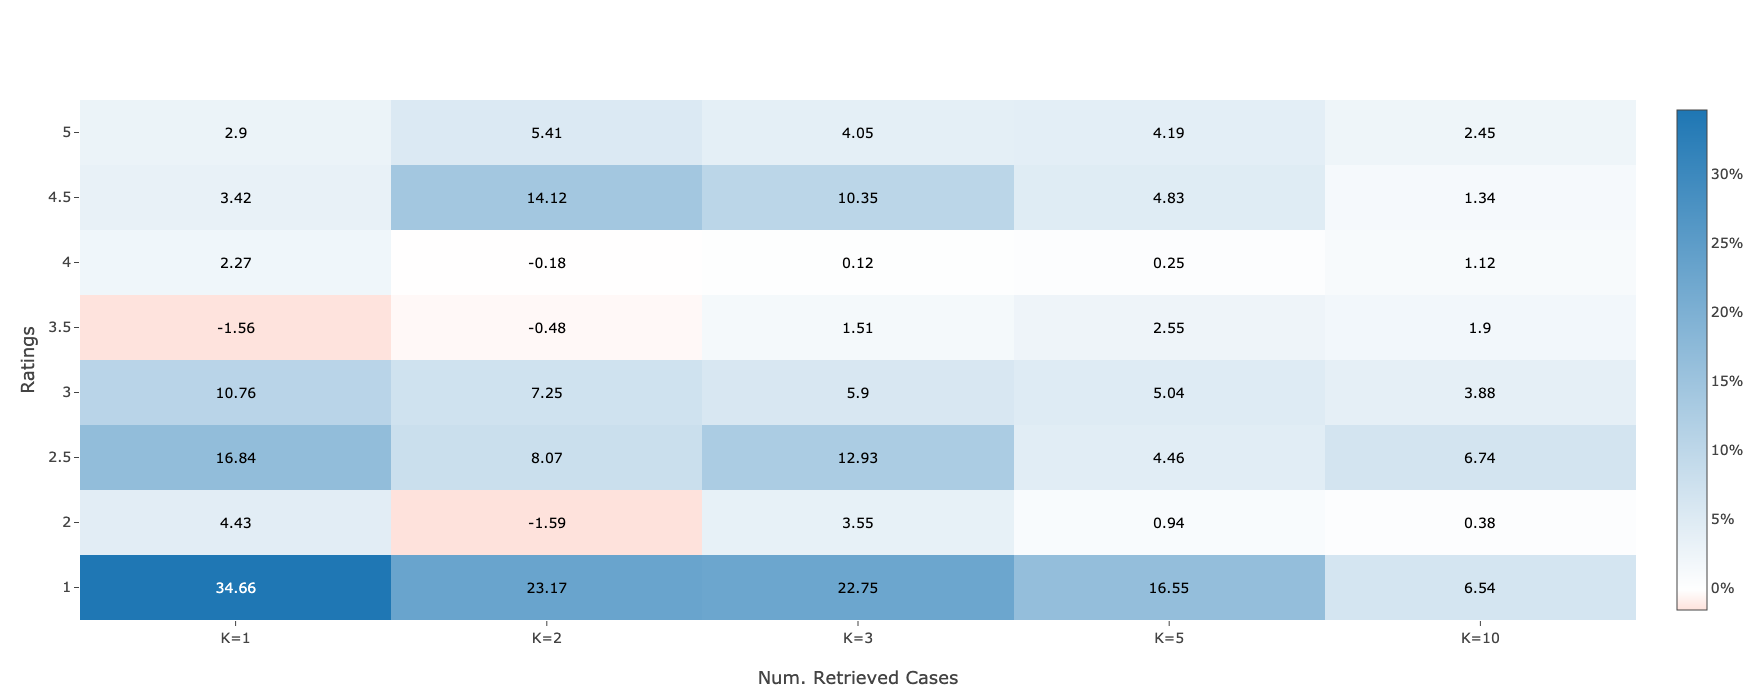

In [17]:
trace = go.Heatmap(z= z_values,
                   x= x_values,
                   y= y_values,
                   colorscale=[[0.0, 'rgb(254,226,220)'], [0.04, 'rgb(255,255,255)'], [1.0, 'rgb(31, 119, 180)']],
                   colorbar=dict(tickfont=dict(size=14), ticksuffix='%'))

layout = go.Layout(
    autosize=False,
    width=700,
    height=700,
    yaxis=dict(
        title='Ratings',
        type='category',
        titlefont=dict(
            size=18
        ),
        tickfont=dict(
            size=14
        )
        #range=[0.5, 5.5]
    ),
    xaxis=dict(
        title = 'Num. Retrieved Cases',
        titlefont=dict(
            size=18
        ),
        tickfont=dict(
            size=14
        )
    ),
    annotations=annotations
)



data=[trace]
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='labelled-heatmap')

In [18]:
pio.write_image(fig, 'heatmap_estratified.png')